# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. [Dataset Apple Quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [25]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f4/5a/ba91b8c57aa37dbd80d5ff958576a9a8c14317b04b671ae7f0d09b00993a/scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.8.0 from https://files.pythonhosted.org/packages/ab/a7/0ddaf514ce8a8714f6ed243a2b391b41dbb65251affe21ee3077ec45ea9a/scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metad


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Membaca dataset
df = pd.read_csv('https://raw.githubusercontent.com/nidaank/Eksperimen_SML_Nida/main/apple-quality_raw.csv')

In [4]:
# Menampilkan 5 kolom teratas dataset
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [5]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


In [7]:
# Menampilkan deskripsi dataset
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [8]:
# Mendeteksi missing value
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
# Mendeteksi data duplicate
df.duplicated().sum()

0

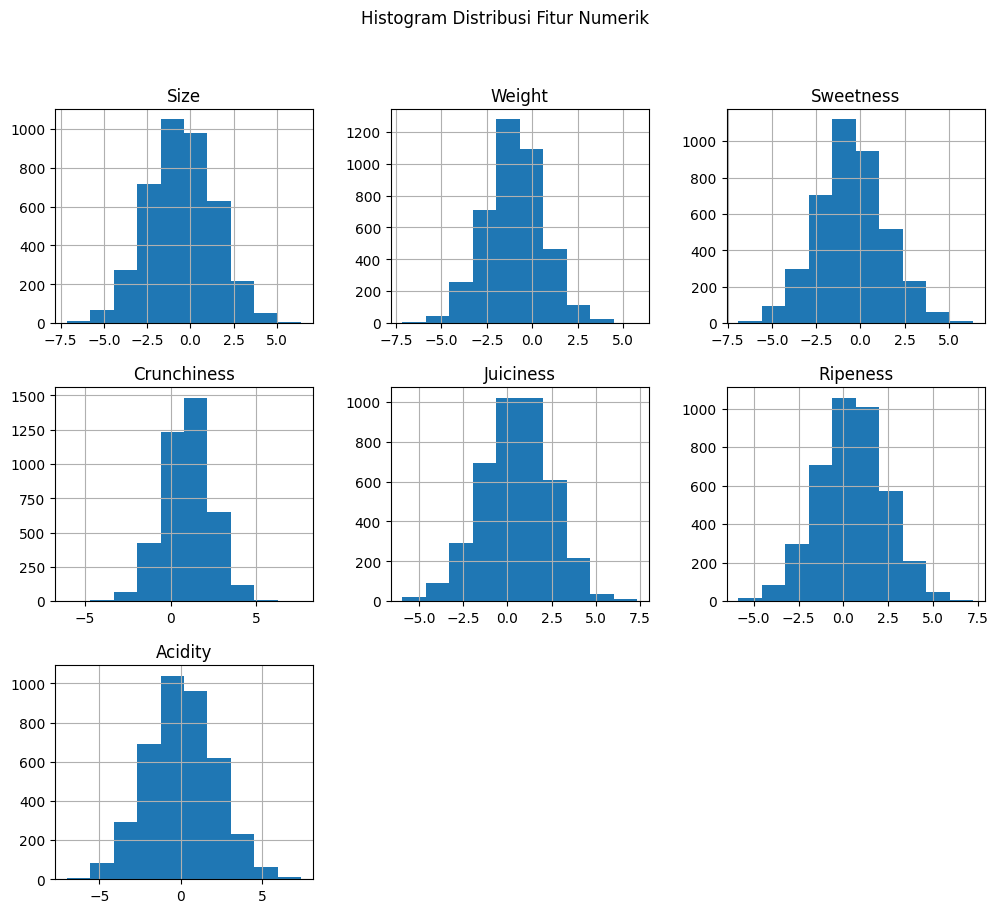

In [10]:
#Histogram distribusi variabel numberik
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[numeric_features].hist(figsize=(12, 10))
plt.suptitle("Histogram Distribusi Fitur Numerik")
plt.show()

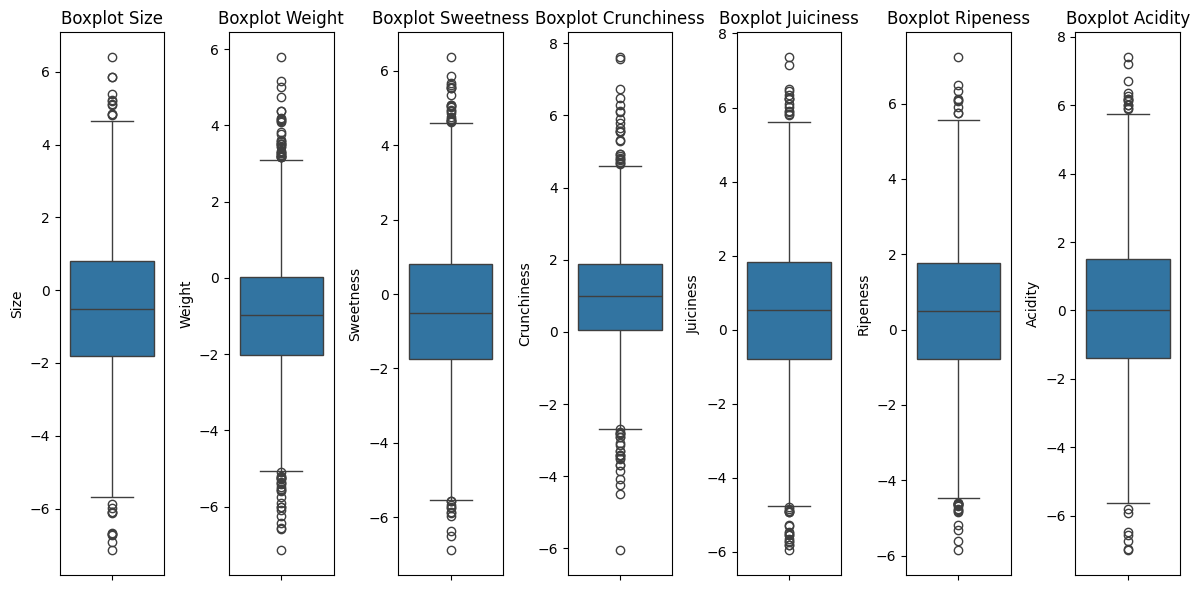

In [11]:
# Mengecek outliers dengan boxplot
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

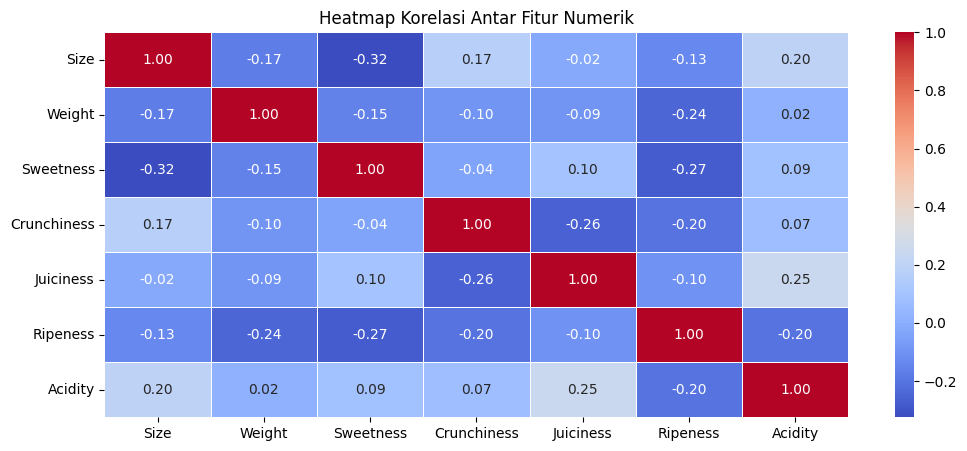

In [12]:
#Headmap korelasi antar fitur numerik
plt.figure(figsize=(12, 5))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

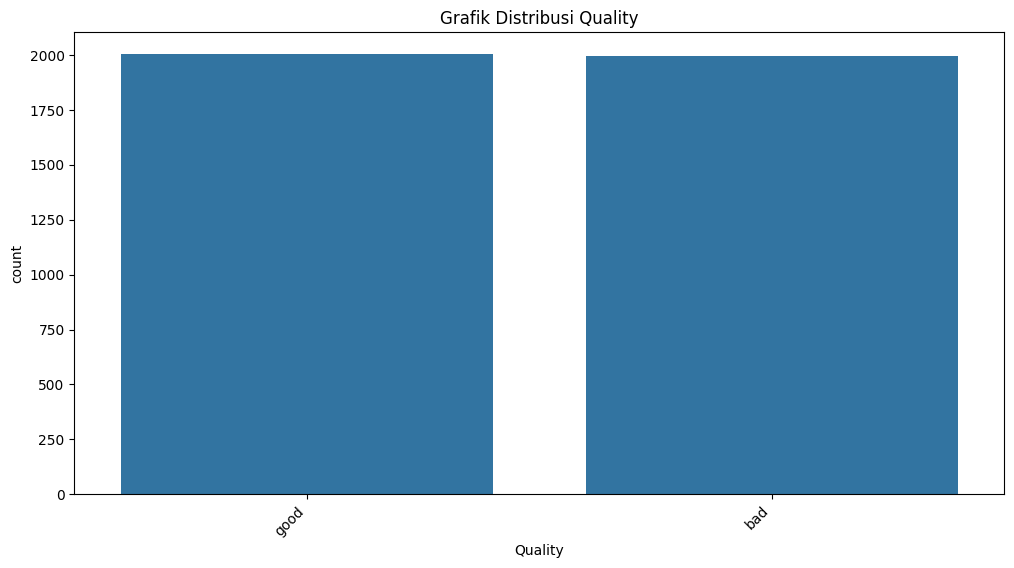

In [13]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Visualisasi distribusi variabel kategorikal
for feature in categorical_features:
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    sns.countplot(x=feature, data=df)  # Use countplot for categorical data
    plt.title(f"Grafik Distribusi {feature}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
# Mendeteksi missing value
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [18]:
# Menghapus baris dengan missing value
df.dropna(inplace=True)  

In [19]:
# Mendeteksi data duplicate
df.duplicated().sum()

0

In [20]:
# Menghapus data duplicate
df.drop_duplicates(inplace=True)

In [30]:
# Normalisasi fitur numberik
scaler = MinMaxScaler()

normalize_df = df.copy()
normalize_df[numeric_features] = scaler.fit_transform(normalize_df[numeric_features])

normalize_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,good
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,good
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,bad
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,good
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,good


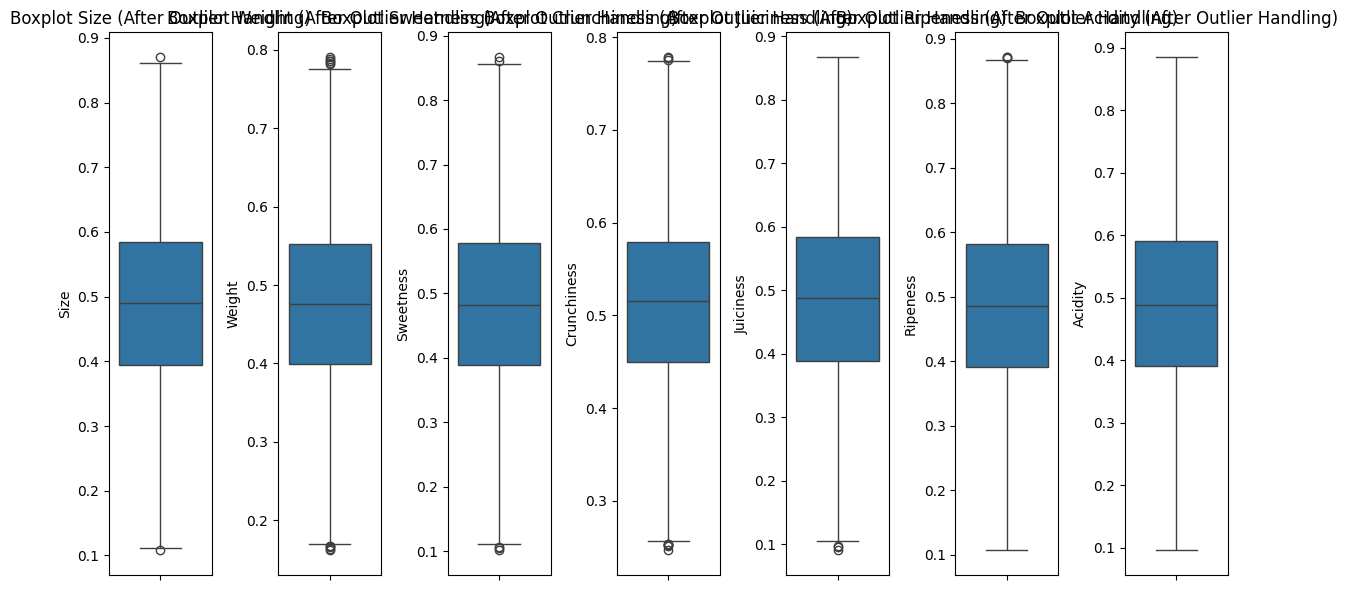

Jumlah data sebelum penggantian outlier : 4000
Jumlah data setelah penggantian outlier  : 4000
Jumlah data yang diganti sebagai outlier : 0


In [31]:
# Mengidentifikasi outliner dengan metode IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers


# Tangani outlier (ganti dengan median)
def handle_outliers(data, outliers):
    median = data.median()
    data[outliers] = median
    return data

# Hitung jumlah data sebelum penanganan outlier
initial_count = normalize_df.shape[0]

# Buat DataFrame normalize_outliner_df dari normalize_df
normalize_outliner_df = normalize_df.copy() # Inisialisasi normalize_outliner_df

# Contoh penggunaan untuk setiap fitur numerik:
for col in numeric_features:
  outliers = detect_outliers_iqr(normalize_df[col])
  normalize_outliner_df[col] = handle_outliers(normalize_df[col].copy(), outliers)

# Hitung jumlah data setelah penanganan outlier
final_count = normalize_outliner_df.shape[0]

# Visualisasikan data setelah penanganan outlier
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(y=normalize_outliner_df[col])
    plt.title(f"Boxplot {col} (After Outlier Handling)")
plt.tight_layout()
plt.show()

# Jumlah data sebelum dan sesudah penanganan outlier
print(f"Jumlah data sebelum penggantian outlier : {initial_count}")
print(f"Jumlah data setelah penggantian outlier  : {final_count}")
print(f"Jumlah data yang diganti sebagai outlier : {initial_count - final_count}") # 0 karena outlier diganti dengan median, bukan dihapus

In [32]:
# Melakukan encoding terhadap fitur categorical
final_df = normalize_outliner_df.copy()

label_encoder = LabelEncoder()

for col in categorical_features:
    final_df[col] = label_encoder.fit_transform(final_df[col])

final_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.234669,0.358370,0.481538,0.368781,0.585819,0.472770,0.452225,1
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1


In [33]:
# Split dataset menjadi 80:20
from sklearn.model_selection import train_test_split

X = final_df.drop('Quality', axis=1)
y = final_df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling** (Additional)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [35]:
# Train & evaluasi model
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"\n=== {name} ===")
    print(f"Accuracy   : {acc:.2%}")
    print(f"F1 Score   : {f1:.2%}")
    print(f"Precision  : {precision:.2%}")
    print(f"Recall     : {recall:.2%}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })


=== Logistic Regression ===
Accuracy   : 74.88%
F1 Score   : 74.87%
Precision  : 74.89%
Recall     : 74.88%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       401
           1       0.74      0.76      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



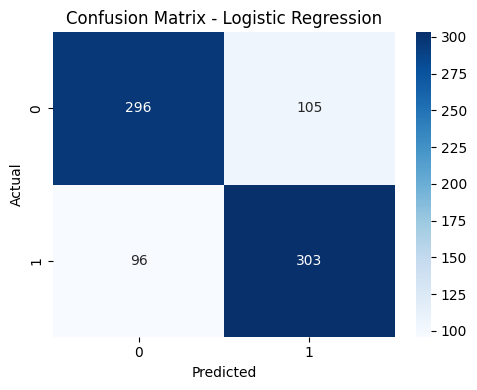


=== Decision Tree ===
Accuracy   : 80.50%
F1 Score   : 80.49%
Precision  : 80.53%
Recall     : 80.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       401
           1       0.81      0.79      0.80       399

    accuracy                           0.81       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.81      0.80       800



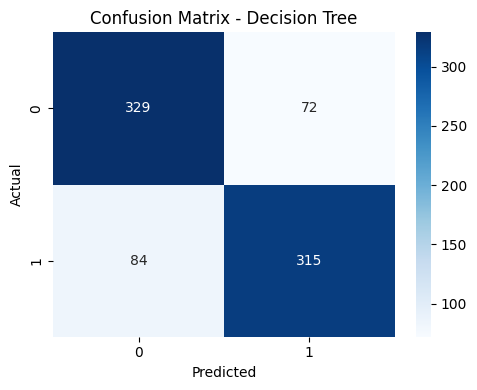


=== Random Forest ===
Accuracy   : 90.12%
F1 Score   : 90.12%
Precision  : 90.14%
Recall     : 90.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       401
           1       0.89      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



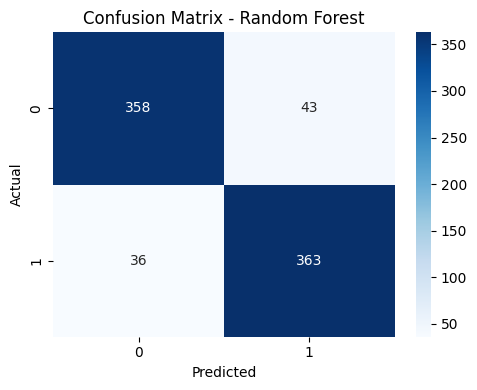


=== K-Nearest Neighbors ===
Accuracy   : 88.50%
F1 Score   : 88.50%
Precision  : 88.50%
Recall     : 88.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       401
           1       0.88      0.89      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.88       800
weighted avg       0.89      0.89      0.88       800



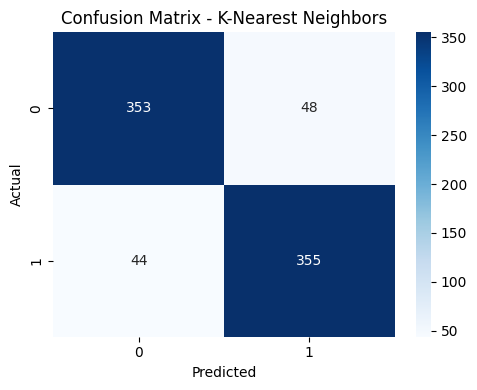

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

results = []

for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test, results)